In [29]:
%matplotlib inline

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import seaborn as sns
from collections import Counter

## produce the all/posi/neg reciprocity df

In [31]:
rawdata=pd.read_csv('/Users/zhangqian/Desktop/Dissertation data/Final data/wiki.csv')
#rawdata=pd.read_csv('/Users/zhangqian/Desktop/111Dissertation/rawdatafromlivan/slashdot.txt', sep="\t", header=None, names=["from",'to','sign'])

In [32]:
def trans_data(rawdata):
    columnsTitles=["to","from","sign"]
    trandata=rawdata.reindex(columns=columnsTitles) #swap column data
    trandata.columns = ['from', 'to','sign'] #change the name of columns
    return trandata
def noreci_data(rawdata,trandata):
    merge_data=pd.merge(left=rawdata,right=trandata,on=['from','to'],how='left')
    noreci_data=merge_data.iloc[np.where(merge_data.sign_x!=merge_data.sign_y)]
    return noreci_data
def reci_data(rawdata,trandata):
    merge_data=pd.merge(left=rawdata,right=trandata,on=['from','to'],how='left')
    reci_data=merge_data.iloc[np.where(merge_data.sign_x==merge_data.sign_y)]
    return reci_data


In [33]:
trandata=trans_data(rawdata)

In [34]:
noreci_data=noreci_data(rawdata,trandata)

In [35]:
noreci_data

,from,to,sign_x,sign_y
0,1,2,-1,NaN
1,3,4,1,NaN
2,3,5,1,NaN
3,3,6,1,NaN
4,3,7,1,NaN
5,3,8,1,NaN
6,3,9,1,NaN
7,3,10,1,NaN
8,3,11,1,NaN
9,3,12,1,NaN


In [36]:
noreci_edge_list=noreci_data[['from', 'to', 'sign_x', 'sign_y']].to_csv('wiki_noreci_edge_list.csv')

In [7]:
all_reci_data=reci_data(rawdata,trandata)

In [8]:
all_reci_data.head()

,from,to,sign_x,sign_y
27,3,30,1,1.0
69,53,73,1,1.0
74,53,78,1,1.0
75,53,79,1,1.0
79,53,83,1,1.0


In [9]:
all_reci_data

,from,to,sign_x,sign_y
27,3,30,1,1.0
69,53,73,1,1.0
74,53,78,1,1.0
75,53,79,1,1.0
79,53,83,1,1.0
81,53,85,1,1.0
85,53,89,1,1.0
189,156,199,1,1.0
295,279,308,1,1.0
339,322,351,1,1.0


In [53]:
len(noreci_data),len(all_reci_data)

(698752, 41645)

In [54]:
posi_reci_data=all_reci_data.iloc[np.where(all_reci_data.sign_x==1)]
neg_reci_data=all_reci_data.iloc[np.where(all_reci_data.sign_x==-1)]

In [55]:
len(posi_reci_data), len(neg_reci_data)

(38005, 3640)

In [26]:
def make_reciprocity_list(recidata):
    from_Data = recidata.groupby(["from"])["to"].unique()
    to_Data = recidata.groupby(["to"])["from"].unique()
    recilist = {}
    for item in from_Data.index:
        recilist[item] = len(np.intersect1d(from_Data[item],to_Data[item]))
    reci_pd=pd.DataFrame({'node' :list(recilist.keys()), 'Reciprocity' : list(recilist.values()) })
    return reci_pd

In [27]:
all_reci_pd=make_reciprocity_list(all_reci_data)

In [62]:
posi_reci_data.head()

,from,to,sign_x,sign_y
27,3,30,1,1.0
69,53,73,1,1.0
74,53,78,1,1.0
75,53,79,1,1.0
79,53,83,1,1.0


In [29]:
all_reci_pd.head()

,Reciprocity,node
0,1,32769
1,1,3
2,1,49156
3,1,58921
4,11,7


In [56]:
posi_reci_pd=make_reciprocity_list(posi_reci_data)

In [57]:
neg_reci_pd=make_reciprocity_list(neg_reci_data)

In [58]:
len(posi_reci_pd), len(neg_reci_pd)

(8197, 1588)

In [60]:
posi_reci_pd.head()

,Reciprocity,node
0,1,49153
1,1,3
2,1,49156
3,1,58921
4,11,7


In [34]:
all_reci_pd.to_csv("wiki_reciprocity0902.csv")
posi_reci_pd.to_csv("wiki_posi_reciprocity0902.csv")
neg_reci_pd.to_csv("wiki_neg_reciprocity0902.csv")

# delete nodes without reciprocity in the original data

## analyse the influence of reciprocity

In [41]:
len(rawdata),len(data),len(data_unreci)

(740397, 138592, 698752)

In [46]:
data_unreci.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation
0,0,1,0,0,1,1,-1,-1.0
1,1,2,3,0,3,3,-3,-1.0
2,2,3,48,8,0,2,6,0.6
3,3,4,0,18,0,0,18,1.0
4,4,5,0,5,0,0,5,1.0


In [44]:
data=pd.read_csv("wiki_12property_0820.csv")
data_unreci=pd.read_csv("wiki_unreci_0903.csv") 
#分析epinion时可以用 
#data_unreci=pd.read_csv("epinion_unreci_0903.csv")
all_reci=pd.read_csv("wiki_reciprocity0902.csv")
posi_reci=pd.read_csv("wiki_posi_reciprocity0902.csv")
neg_reci=pd.read_csv("wiki_neg_reciprocity0902.csv")


In [65]:
data.head()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close
0,0,1,0,0,1,1,0.000000,0.002727,0.000000,1.253820e-07,-1,-1.000000,0.000000,0.000000,0.000000,0.132351
1,1,2,3,0,3,3,0.000000,0.003078,0.000000,3.314906e-05,-3,-1.000000,0.000000,0.066667,0.000024,0.164387
2,2,3,49,9,0,2,0.000700,0.000345,0.000007,0.000000e+00,7,0.636364,0.304511,0.000000,0.204564,0.000000
3,3,4,0,18,0,0,0.000724,0.000000,0.000000,0.000000e+00,18,1.000000,0.607843,0.000000,0.000000,0.000000
4,4,5,0,5,0,0,0.000086,0.000000,0.000000,0.000000e+00,5,1.000000,0.900000,0.000000,0.000000,0.000000


In [71]:
## 建表时多建了很多栏，可以选择去掉degree都为0的
## why it doesn't work!!?
data_unreci.drop((data_unreci['posi_outdegree']==0) &(data_unreci['posi_indegree']==0) &(data_unreci['neg_outdegree']==0) & (data_unreci['neg_indegree']==0))

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation
2,2,3,48,8,0,2,6,0.600000
3,3,4,0,18,0,0,18,1.000000
4,4,5,0,5,0,0,5,1.000000
5,5,6,0,3,0,0,3,1.000000
6,6,7,200,37,1,4,33,0.804878
7,7,8,0,15,0,2,13,0.764706
8,8,9,0,12,0,0,12,1.000000
9,9,10,0,26,0,0,26,1.000000
10,10,11,0,2,0,0,2,1.000000
11,11,12,33,14,0,2,12,0.750000


In [66]:
len(rawdata),len(data), len(data_unreci),len(all_reci),len(posi_reci), len(neg_reci)

(740397, 138592, 740396, 9007, 8197, 1588)

In [138]:
sum(data['posi_indegree']+ data['posi_outdegree']+data['neg_outdegree']+data['neg_indegree']) #549202

1098404

In [131]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [72]:
sum(all_reci['Reciprocity']), sum(posi_reci['Reciprocity']), sum(neg_reci['Reciprocity'])

(41645, 38005, 3640)

b: blue
g: green
r: red
c: cyan
m: magenta
y: yellow
k: black
w: white

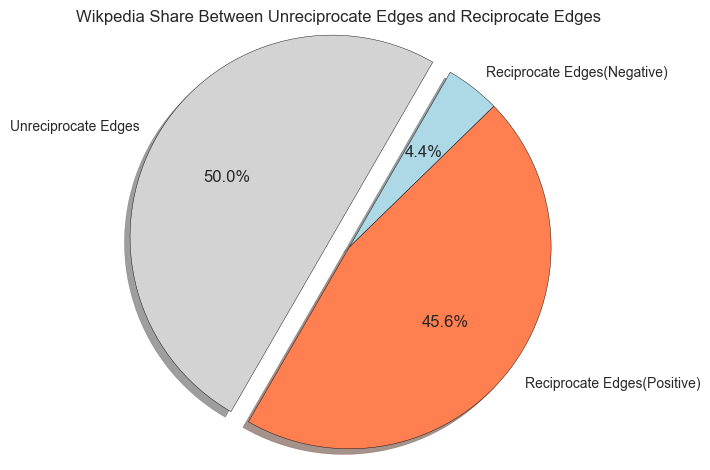

In [179]:
# Data to plot
labels = 'Unreciprocate Edges','Reciprocate Edges(Positive)','Reciprocate Edges(Negative)'
sizes = [41645, 38005, 3640] #总的edge数549202
colors = ['lightgrey','coral','lightblue']
explode = (0.1, 0,0)  # explode 1st slice
#

# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)

plt.title('Wikpedia Share Between Unreciprocate Edges and Reciprocate Edges') 
plt.axis('equal')
plt.show()

In [80]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

In [81]:
data=data[['node', 'reputation', 'normalized_reputation', 'posi_outdegree', 'posi_indegree','posi_eigenvalue','posi_between','posi_close','posi_cluster','neg_outdegree', 'neg_indegree','neg_eigenvalue', 'neg_between', 'neg_close','neg_cluster']]

In [85]:
data_unreci.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'reputation', 'normalized_reputation'],
      dtype='object')

In [86]:
data_noreci=data_unreci[['node', 'reputation', 'normalized_reputation','posi_outdegree', 'posi_indegree', 'neg_outdegree', 'neg_indegree']]

In [82]:
data.describe()

,node,reputation,normalized_reputation,posi_outdegree,posi_indegree,posi_eigenvalue,posi_between,posi_close,posi_cluster,neg_outdegree,neg_indegree,neg_eigenvalue,neg_between,neg_close,neg_cluster
count,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000,138592.000000
mean,69296.500000,4.047196,0.663932,4.694737,4.694737,0.000489,0.000004,0.037914,0.195464,0.647541,0.647541,0.000461,0.000006,0.013217,0.007250
std,40008.208591,28.854592,0.641276,26.940917,34.099508,0.002641,0.000144,0.079067,0.324909,6.369446,8.338027,0.002646,0.000171,0.041752,0.067412
min,1.000000,-260.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34648.750000,1.000000,0.688889,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69296.500000,1.000000,1.000000,0.000000,1.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,103944.250000,2.000000,1.000000,0.000000,3.000000,0.000248,0.000000,0.000000,0.318182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,138592.000000,5416.000000,1.000000,2524.000000,6708.000000,0.222896,0.045694,0.300532,1.000000,595.000000,2608.000000,0.204255,0.028356,0.229430,1.000000


In [87]:
data_unreci.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,reputation,normalized_reputation
count,740396.000000,740396.000000,740396.000000,740396.000000,740396.000000,740396.000000,740396.000000,130409.000000
mean,370197.500000,370198.500000,0.827460,0.827460,0.116295,0.116295,0.711165,0.699176
std,213734.059291,213734.059291,10.607666,13.654794,2.594300,3.546170,11.503824,0.641756
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-215.000000,-1.000000
25%,185098.750000,185099.750000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,370197.500000,370198.500000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,555296.250000,555297.250000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,740395.000000,740396.000000,2232.000000,5901.000000,556.000000,2599.000000,5012.000000,1.000000


Examples for the use are scores of the same set of student in different exams, or repeated sampling from the same units. The test measures whether the average score differs significantly across samples (e.g. exams). If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

## T test on the independence of the two reputations

In [88]:
#Calculates the T-test on TWO RELATED samples of scores, a and b.
#This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected)values.
scipy.stats.ttest_rel(data.reputation, data_noreci.reputation)

ValueError: unequal length arrays

In [11]:
scipy.stats.ttest_rel(data.normalized_reputation, data_noreci.normalized_reputation)

Ttest_relResult(statistic=87.739152537364916, pvalue=0.0)

In [12]:
#alculates the T-test for the means of two independent samples of scores.
#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.
scipy.stats.ttest_ind(data.reputation, data_noreci.reputation, equal_var=False) 


Ttest_indResult(statistic=7.6773806205470096, pvalue=1.6326811729171172e-14)

In [13]:
scipy.stats.ttest_ind(data.normalized_reputation, data_noreci.normalized_reputation, equal_var=False)

Ttest_indResult(statistic=30.345614341774965, pvalue=1.0413874781336944e-201)

## Reciprocity's influence on reputation 

In [ ]:
data=pd.read_csv("wiki_12property_0820.csv")
data_unreci=pd.read_csv("wiki_unreci_0903.csv") 
#分析epinion时可以用 
#data_unreci=pd.read_csv("epinion_unreci_0903.csv")
all_reci=pd.read_csv("wiki_reciprocity0902.csv")
posi_reci=pd.read_csv("wiki_posi_reciprocity0902.csv")
neg_reci=pd.read_csv("wiki_neg_reciprocity0902.csv")

In [89]:
data["new_norm_repu"]=(data['posi_indegree']-data['neg_indegree'])/(data['posi_indegree']+data['neg_indegree'])

In [90]:
data

,node,reputation,normalized_reputation,posi_outdegree,posi_indegree,posi_eigenvalue,posi_between,posi_close,posi_cluster,neg_outdegree,neg_indegree,neg_eigenvalue,neg_between,neg_close,neg_cluster,new_norm_repu
0,1,-1,-1.000000,0,0,0.000000,0.000000e+00,0.000000,0.000000,1,1,2.727014e-03,1.253820e-07,0.132351,0.000000,-1.000000
1,2,-3,-1.000000,3,0,0.000000,0.000000e+00,0.000024,0.000000,3,3,3.077733e-03,3.314906e-05,0.164387,0.066667,-1.000000
2,3,7,0.636364,49,9,0.000700,7.257345e-06,0.204564,0.304511,0,2,3.450585e-04,0.000000e+00,0.000000,0.000000,0.636364
3,4,18,1.000000,0,18,0.000724,0.000000e+00,0.000000,0.607843,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
4,5,5,1.000000,0,5,0.000086,0.000000e+00,0.000000,0.900000,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
5,6,3,1.000000,0,3,0.000481,0.000000e+00,0.000000,0.666667,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
6,7,44,0.846154,211,48,0.003236,5.360309e-05,0.223583,0.074540,1,4,5.589145e-04,7.227263e-06,0.000024,0.100000,0.846154
7,8,13,0.764706,0,15,0.001407,0.000000e+00,0.000000,0.619048,0,2,5.516662e-04,0.000000e+00,0.000000,0.000000,0.764706
8,9,12,1.000000,0,12,0.000182,0.000000e+00,0.000000,0.636364,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
9,10,26,1.000000,0,26,0.000982,0.000000e+00,0.000000,0.609231,0,0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000


In [91]:
#choose nodes with norm_repu 
node_has_norm_repu=data[data['new_norm_repu'].notnull()]

In [92]:
node_has_norm_repu.to_csv('wiki_regressiondata_0903.csv')

In [93]:
len(node_has_norm_repu),len(data) ##有7500个node是没有norm rep的!! 比其他两个网络少

(131059, 138592)

In [94]:
node_has_norm_repu['new_norm_repu'].describe()

count    131059.000000
mean          0.702094
std           0.638810
min          -1.000000
25%           0.923077
50%           1.000000
75%           1.000000
max           1.000000
Name: new_norm_repu, dtype: float64

In [95]:
node_has_norm_repu.columns

Index(['node', 'reputation', 'normalized_reputation', 'posi_outdegree',
       'posi_indegree', 'posi_eigenvalue', 'posi_between', 'posi_close',
       'posi_cluster', 'neg_outdegree', 'neg_indegree', 'neg_eigenvalue',
       'neg_between', 'neg_close', 'neg_cluster', 'new_norm_repu'],
      dtype='object')

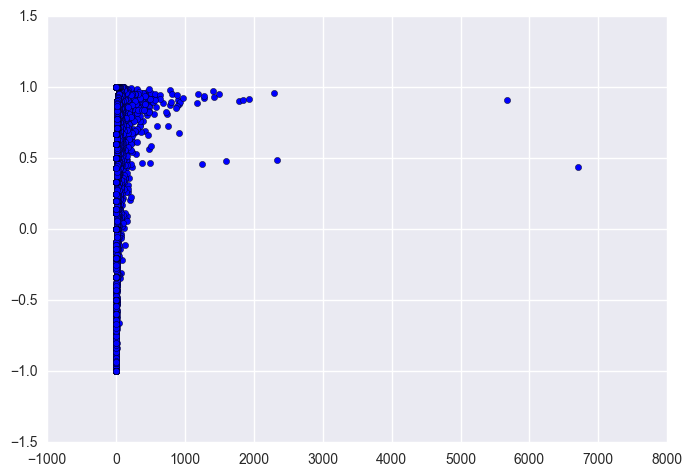

In [96]:
plt.scatter(node_has_norm_repu['posi_indegree'],node_has_norm_repu['normalized_reputation'])

In [282]:
node_has_norm_repu.describe()

,Unnamed: 0,node,posi_outdegree,posi_indegree,neg_outdegree,neg_indegree,posi_eigenvalue,neg_eigenvalue,posi_between,neg_between,reputation,normalized_reputation,posi_cluster,neg_cluster,posi_close,neg_close,new_norm_repu
count,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,7.028400e+04,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000
mean,36644.444383,36644.444383,5.583575,6.047920,1.705168,1.766120,4.568743e-04,0.000848,0.000019,0.000013,4.281800,0.549008,0.055100,0.004113,0.059509,0.018331,0.549008
std,21804.835235,21804.835235,19.988040,29.460289,10.722791,8.178778,3.744256e-03,0.003676,0.000185,0.000174,26.953977,0.687502,0.179745,0.043607,0.079891,0.048071,0.687502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-350.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,17854.750000,17854.750000,0.000000,1.000000,0.000000,0.000000,3.068884e-07,0.000000,0.000000,0.000000,1.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.272727
50%,36270.500000,36270.500000,0.000000,1.000000,0.000000,0.000000,1.347076e-05,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,54498.500000,54498.500000,3.000000,4.000000,0.000000,1.000000,9.403137e-05,0.000259,0.000002,0.000000,3.000000,1.000000,0.014758,0.000000,0.152144,0.000000,1.000000
max,82142.000000,82142.000000,428.000000,2512.000000,400.000000,498.000000,1.518648e-01,0.161218,0.017686,0.016219,2481.000000,1.000000,1.000000,1.000000,0.245518,0.211460,1.000000


In [97]:
Counter(node_has_norm_repu['posi_indegree'])

Counter({0: 14007,
         1: 65671,
         2: 14723,
         3: 7708,
         4: 4967,
         5: 3722,
         6: 2693,
         7: 2141,
         8: 1749,
         9: 1445,
         10: 1159,
         11: 1033,
         12: 866,
         13: 757,
         14: 642,
         15: 578,
         16: 468,
         17: 435,
         18: 372,
         19: 379,
         20: 292,
         21: 290,
         22: 239,
         23: 246,
         24: 218,
         25: 185,
         26: 172,
         27: 176,
         28: 162,
         29: 149,
         30: 142,
         31: 118,
         32: 130,
         33: 120,
         34: 107,
         35: 112,
         36: 108,
         37: 93,
         38: 72,
         39: 88,
         40: 67,
         41: 77,
         42: 77,
         43: 83,
         44: 85,
         45: 63,
         46: 52,
         47: 47,
         48: 54,
         49: 49,
         50: 42,
         51: 44,
         52: 47,
         53: 46,
         54: 29,
         55: 38,
      

In [98]:
Counter(node_has_norm_repu['neg_indegree'])

Counter({0: 97412,
         1: 24639,
         2: 3570,
         3: 1447,
         4: 829,
         5: 540,
         6: 382,
         7: 284,
         8: 219,
         9: 214,
         10: 182,
         11: 147,
         12: 132,
         13: 118,
         14: 88,
         15: 81,
         16: 62,
         17: 58,
         18: 57,
         19: 42,
         20: 45,
         21: 40,
         22: 30,
         23: 30,
         24: 24,
         25: 19,
         26: 18,
         27: 14,
         28: 20,
         29: 21,
         30: 8,
         31: 21,
         32: 10,
         33: 11,
         34: 9,
         35: 16,
         36: 6,
         37: 8,
         38: 11,
         39: 15,
         40: 8,
         41: 8,
         42: 15,
         43: 3,
         44: 6,
         45: 2,
         46: 4,
         47: 8,
         48: 4,
         49: 8,
         50: 4,
         51: 3,
         52: 7,
         53: 4,
         54: 3,
         55: 4,
         56: 2,
         57: 3,
         58: 1,
         

In [297]:
# choose the nodes with 1 norm_repu 
node_one_repu=node_has_norm_repu[node_has_norm_repu['normalized_reputation']==1] #40987

In [300]:
node_one_repu_one_posi_indegree=node_one_repu[node_has_norm_repu['posi_indegree']==1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [301]:
len(node_one_repu),len(node_one_repu_one_posi_indegree)

(40987, 23220)

In [302]:
node_one_repu_notone_posi_indegree=node_one_repu[node_has_norm_repu['posi_indegree']!=1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [305]:
len(node_one_repu_notone_posi_indegree)

17767

In [310]:
len()

23220

In [325]:
zz=node_has_norm_repu[(node_has_norm_repu['posi_indegree']<=100) & (node_has_norm_repu['normalized_reputation']!=1)]
                          

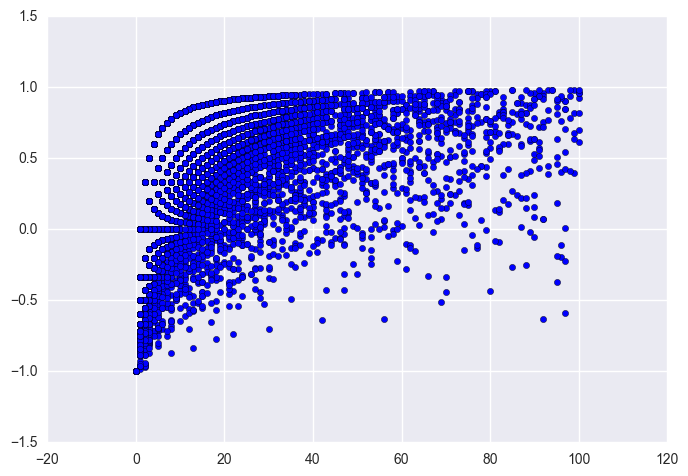

In [326]:
plt.scatter(zz['posi_indegree'], zz['normalized_reputation'])

In [328]:
# choose the nodes with minus 1 and 1 norm_repu and either the the posi_indegree or neg_indegree is not 0
node_minusone_repu=node_has_norm_repu[node_has_norm_repu['normalized_reputation']==-1] #8390,

In [329]:
node_minusone_repu_one_neg_indegree= node_minusone_repu[node_has_norm_repu['neg_indegree']==1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [330]:
len(node_minusone_repu),len(node_minusone_repu_one_neg_indegree)

(8390, 6605)

(array([  8.39100000e+03,   6.00000000e+00,   7.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.10000000e+01,
          5.00000000e+00,   6.00000000e+00,   1.30000000e+01,
          1.20000000e+01,   2.30000000e+01,   1.50000000e+01,
          3.80000000e+01,   1.30000000e+01,   5.00000000e+01,
          1.60000000e+01,   8.70000000e+01,   6.00000000e+00,
          2.20000000e+01,   3.00000000e+00,   1.64000000e+02,
          1.10000000e+01,   3.80000000e+01,   1.90000000e+01,
          7.00000000e+00,   3.59000000e+02,   2.40000000e+01,
          4.20000000e+01,   8.10000000e+01,   1.30000000e+01,
          5.00000000e+01,   2.60000000e+01,   1.30000000e+01,
          1.01400000e+03,   1.70000000e+01,   2.50000000e+01,
          5.40000000e+01,   8.30000000e+01,   4.00000000e+01,
          3.35000000e+02,   1.40000000e+01,   5.40000000e+01,
          1.80000000e+02,   3.50000000e+01,   1.17000000e+02,
          7.10000000e+01,   6.80000000e+01,   4.40000000e+01,
        

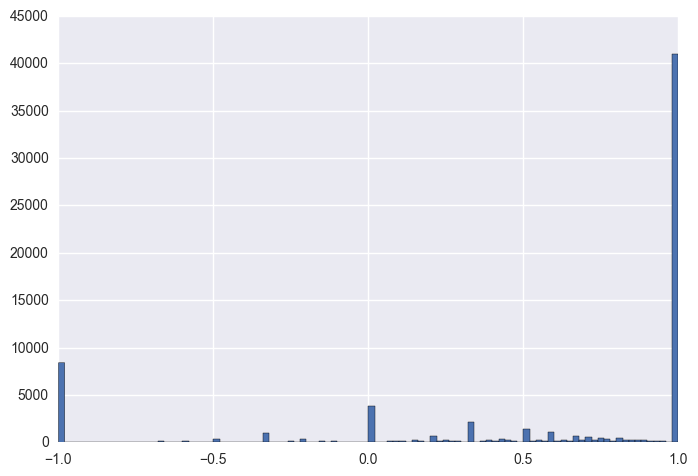

In [228]:
plt.hist(node_has_norm_repu['new_norm_repu'],bins=100)

In [331]:
z=node_has_norm_repu.copy()

In [191]:
len(data), len(data_unreci),len(all_reci),len(posi_reci), len(neg_reci)

(82144, 82144, 22093, 20933, 3682)

In [192]:
data.columns

Index(['Unnamed: 0', 'node', 'posi_outdegree', 'posi_indegree',
       'neg_outdegree', 'neg_indegree', 'posi_eigenvalue', 'neg_eigenvalue',
       'posi_between', 'neg_between', 'reputation', 'normalized_reputation',
       'posi_cluster', 'neg_cluster', 'posi_close', 'neg_close'],
      dtype='object')

## build the dataframe to analyse reciprocity and norm_repu
## exclude the nodes which don't have norm_repu
## by using the new csv.

In [127]:
node_has_norm_repu.to_csv('wiki_regressiondata_0903.csv')

In [101]:
needlist=['node','reputation','normalized_reputation']
node_two_repu = pd.merge(node_has_norm_repu[needlist],data_unreci[needlist],on='node', how='left')

In [102]:
len(node_two_repu)

131059

In [103]:
node_two_repu

,node,reputation_x,normalized_reputation_x,reputation_y,normalized_reputation_y
0,1,-1,-1.000000,-1,-1.000000
1,2,-3,-1.000000,-3,-1.000000
2,3,7,0.636364,6,0.600000
3,4,18,1.000000,18,1.000000
4,5,5,1.000000,5,1.000000
5,6,3,1.000000,3,1.000000
6,7,44,0.846154,33,0.804878
7,8,13,0.764706,13,0.764706
8,9,12,1.000000,12,1.000000
9,10,26,1.000000,26,1.000000


In [128]:
node_two_repu.columns=['node', 'reci_repu','reci_norm_repu','unreci_repu','unreci_norm_repu']

In [129]:
node_two_repu.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu
0,1,-1,-1.000000,-1,-1.0
1,2,-3,-1.000000,-3,-1.0
2,3,7,0.636364,6,0.6
3,4,18,1.000000,18,1.0
4,5,5,1.000000,5,1.0


In [130]:
all_reci

,Unnamed: 0,Reciprocity,node
0,0,1,32769
1,1,1,3
2,2,1,49156
3,3,1,58921
4,4,11,7
5,5,4,16392
6,6,1,49162
7,7,1,16395
8,8,6,12
9,9,3,13


## build the reciprocity df

In [131]:
test1=pd.merge(node_two_repu,all_reci[['node','Reciprocity']],on='node', how='left')

In [132]:
test1.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity
0,1,-1,-1.000000,-1,-1.0,NaN
1,2,-3,-1.000000,-3,-1.0,NaN
2,3,7,0.636364,6,0.6,1.0
3,4,18,1.000000,18,1.0,NaN
4,5,5,1.000000,5,1.0,NaN


In [133]:
len(test1)

131059

In [134]:
bneedlist=['node','Reciprocity']
testdf2=pd.merge(all_reci[bneedlist],posi_reci[bneedlist],on='node', how='left')

In [135]:
len(testdf2)

9007

In [136]:
testdf3=pd.merge(testdf2,neg_reci[bneedlist],on='node', how='left')

In [137]:
testdf3.columns=['node','all_reci','posi_reci','neg_reci']

In [138]:
len(testdf3)

9007

In [139]:
testdf3.head()

,node,all_reci,posi_reci,neg_reci
0,32769,1,NaN,1.0
1,3,1,1.0,NaN
2,49156,1,1.0,NaN
3,58921,1,1.0,NaN
4,7,11,11.0,NaN


In [140]:
repu_reci=pd.merge(test1, testdf3, on='node', how='left')

In [141]:
repu_reci.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci
0,1,-1,-1.000000,-1,-1.0,NaN,NaN,NaN,NaN
1,2,-3,-1.000000,-3,-1.0,NaN,NaN,NaN,NaN
2,3,7,0.636364,6,0.6,1.0,1.0,1.0,NaN
3,4,18,1.000000,18,1.0,NaN,NaN,NaN,NaN
4,5,5,1.000000,5,1.0,NaN,NaN,NaN,NaN


In [43]:
##注意！！ 将na换成0 会影响整个distribution，在分析reciprocity distri的时候一定要用原始数据， 而不是这个
#repu_reci=repu_reci.fillna(value=0)

In [142]:
repu_reci.columns

Index(['node', 'reci_repu', 'reci_norm_repu', 'unreci_repu',
       'unreci_norm_repu', 'Reciprocity', 'all_reci', 'posi_reci', 'neg_reci'],
      dtype='object')

In [143]:
len(repu_reci)

131059

In [144]:
repu_reci['repu_diff']=repu_reci['reci_repu']-repu_reci['unreci_repu']
repu_reci['norm_repu_diff']=repu_reci['reci_norm_repu']-repu_reci['unreci_norm_repu']
repu_reci['posi_neg_reci_diff']=repu_reci['posi_reci']-repu_reci['neg_reci']

In [362]:
len(repu_reci)

70284

In [368]:
repu_reci.head()

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci,repu_diff,norm_repu_diff,posi_neg_reci_diff
0,0,170,0.745614,159,0.739535,13.0,13.0,12.0,1.0,11,0.006079,11.0
1,1,74,0.637931,51,0.560440,25.0,25.0,24.0,1.0,23,0.077491,23.0
2,2,20,1.000000,20,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
3,3,43,0.811321,38,0.791667,5.0,5.0,5.0,NaN,5,0.019654,NaN
4,4,94,0.758065,94,0.758065,NaN,NaN,NaN,NaN,0,0.000000,NaN


In [364]:
repu_reci.columns

Index(['node', 'reci_repu', 'reci_norm_repu', 'unreci_repu',
       'unreci_norm_repu', 'Reciprocity', 'all_reci', 'posi_reci', 'neg_reci',
       'repu_diff', 'norm_repu_diff', 'posi_neg_reci_diff'],
      dtype='object')

In [365]:
repu_reci.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci,repu_diff,norm_repu_diff,posi_neg_reci_diff
count,70284.000000,70284.000000,70284.000000,70284.000000,70284.000000,22093.000000,22093.000000,20933.000000,3682.000000,70284.000000,70284.000000,2522.000000
mean,36644.444383,4.281800,0.549008,3.211627,0.431898,4.234101,4.234101,4.030956,2.488865,1.070172,0.117110,5.909199
std,21804.835235,26.953977,0.687502,25.199101,0.709691,12.060445,12.060445,11.872121,4.021136,6.593597,0.351048,16.434503
min,0.000000,-350.000000,-1.000000,-388.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-65.000000,-1.714286,-65.000000
25%,17854.750000,1.000000,0.272727,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,36270.500000,1.000000,1.000000,1.000000,0.983122,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,54498.500000,3.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
max,82142.000000,2481.000000,1.000000,2472.000000,1.000000,362.000000,362.000000,362.000000,66.000000,362.000000,1.941176,203.000000


In [145]:
repu_reci.to_csv('wiki_repu_reci0902')

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

np.random.seed(0)
x = np.random.uniform(0.0,10.0,15)
y = np.random.uniform(0.0,10.0,15)

datafile = cbook.get_sample_data('/Users/zhangqian/Desktop/111Dissertation/figuresonline/signed and directed graph.png')
img = imread(datafile)
plt.scatter(x,y,zorder=1)
plt.hist(posi_reci['Reciprocity'],bins=500)
#plt.xlim(0,50)
#Use the extent keyword of imshow. The order of the argument is [left, right, bottom, top]
#extent : scalars (left, right, bottom, top), optional, default: None
#The location, in data-coordinates, of the lower-left and upper-right corners. If None, the image is positioned such that the pixel centers fall on zero-based (row, column) indices.


plt.imshow(img,extent=[0,10000,0,12000]) #, zorder=0,
 
plt.show()

In [163]:
len(repu_reci['Reciprocity'].dropna())

9007

In [162]:
repu_reci

,node,reci_repu,reci_norm_repu,unreci_repu,unreci_norm_repu,Reciprocity,all_reci,posi_reci,neg_reci,repu_diff,norm_repu_diff,posi_neg_reci_diff
0,1,-1,-1.000000,-1,-1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
1,2,-3,-1.000000,-3,-1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
2,3,7,0.636364,6,0.600000,1.0,1.0,1.0,NaN,1,0.036364,NaN
3,4,18,1.000000,18,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
4,5,5,1.000000,5,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
5,6,3,1.000000,3,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
6,7,44,0.846154,33,0.804878,11.0,11.0,11.0,NaN,11,0.041276,NaN
7,8,13,0.764706,13,0.764706,NaN,NaN,NaN,NaN,0,0.000000,NaN
8,9,12,1.000000,12,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN
9,10,26,1.000000,26,1.000000,NaN,NaN,NaN,NaN,0,0.000000,NaN


(array([  1.47300000e+03,   7.00000000e+01,   1.80000000e+01,
          1.10000000e+01,   8.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1. ,   5.8,  10.6,  15.4,  20.2,  25. ,  29.8,  34.6,  39.4,
         44.2,  49. ]),
 <a list of 10 Patch objects>)

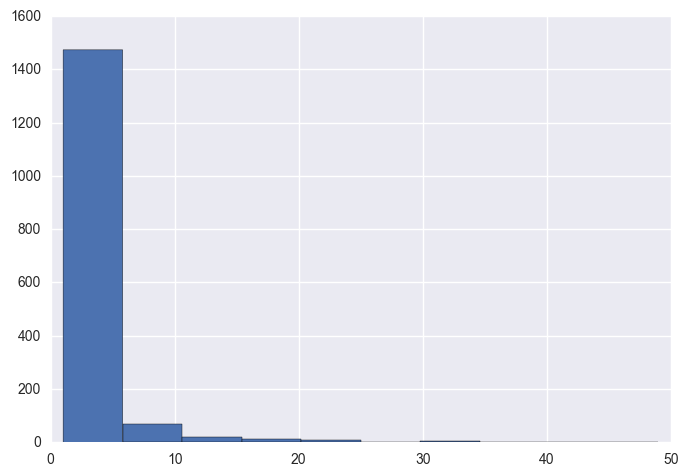

In [161]:
plt.hist(repu_reci['neg_reci'].dropna())
#plt.xlim(0,50)

(array([ 1039.,   245.,    97.,    48.,    82.,    32.,    18.,    18.,
            5.,     4.]),
 array([ 0.        ,  0.16901961,  0.33803922,  0.50705882,  0.67607843,
         0.84509804,  1.01411765,  1.18313726,  1.35215686,  1.52117647,
         1.69019608]),
 <a list of 10 Patch objects>)

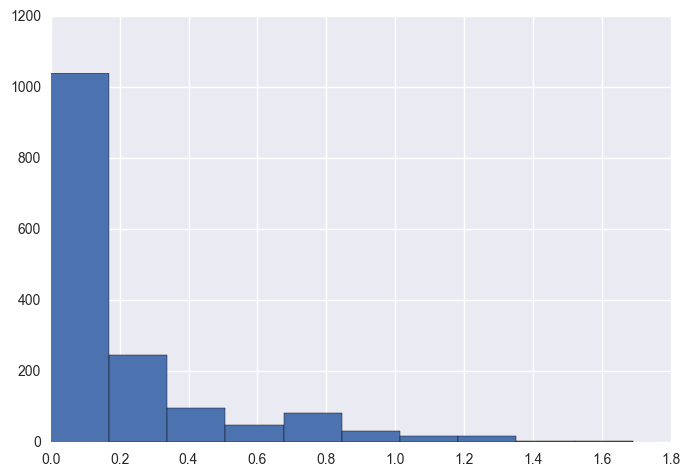

In [149]:
plt.hist(np.log10(repu_reci['neg_reci'].dropna()))

In [155]:
all_reci_dic=Counter(repu_reci['Reciprocity'].dropna())
posi_reci_dic=Counter(repu_reci['posi_reci'].dropna())
neg_reci_dic=Counter(repu_reci['neg_reci'].dropna())

In [160]:
len(all_reci_dic),len(posi_reci_dic),len(neg_reci_dic), #the data is too small to draw powerlaw !

(97, 98, 30)

In [151]:
import powerlaw

In [169]:
powerlaw.Fit(list(all_reci_dic.values())).power_law.alpha


Calculating best minimal value for power law fit


1.5633291985650528

In [170]:
powerlaw.Fit(list(posi_reci_dic.values())).power_law.alpha

Calculating best minimal value for power law fit


1.6507981663128539

In [168]:
powerlaw.Fit(list(neg_reci_dic.values())).power_law.alpha

Calculating best minimal value for power law fit


1.6242587843770151

[None, None, None, None, None, None, None]

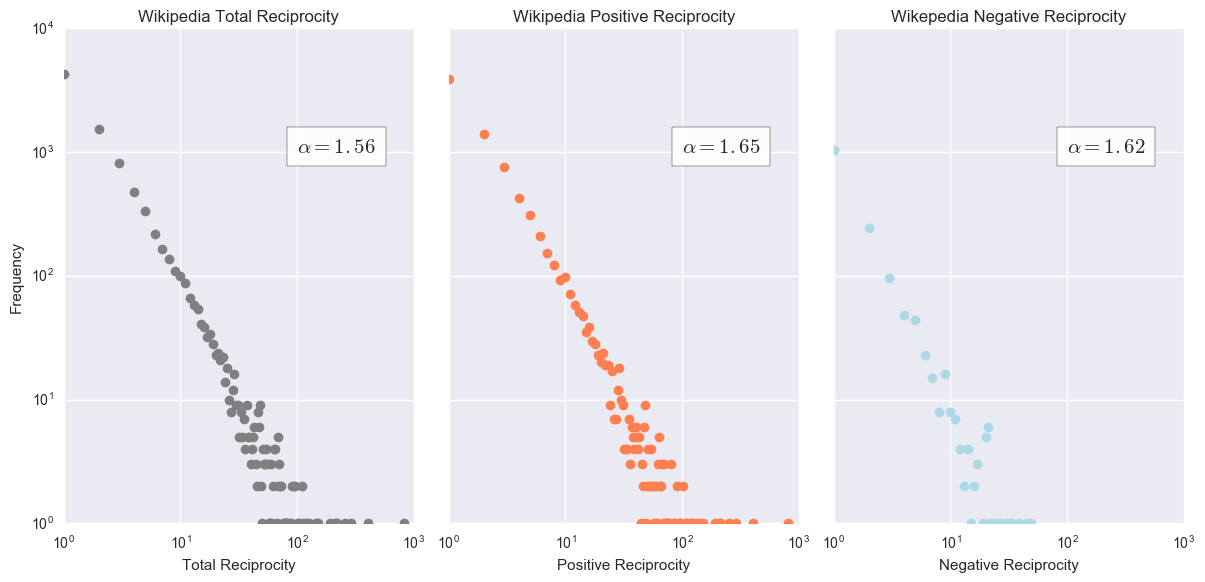

In [174]:
import pylab
plt.figure(1)
#ax1.text(100, 100000, r'$\alpha=1.55$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})


# all reci
ax1=plt.subplot(131)
ax1.loglog(list(all_reci_dic.keys()),list(all_reci_dic.values()),'grey',marker='o',linestyle='None')
ax1.set_title("Wikipedia Total Reciprocity")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Total Reciprocity")
ax1.text(100, 1000, r'$\alpha=1.56$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax1.grid(True)

#posi reci
ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
ax2.loglog(list(posi_reci_dic.keys()),list(posi_reci_dic.values()),'coral',marker='o',linestyle='None')
ax2.set_title("Wikipedia Positive Reciprocity")
ax2.set_xlabel("Positive Reciprocity")
ax2.set_ylim([0, 10000])
ax2.text(100, 1000, r'$\alpha=1.65$',fontsize=15, style='italic', bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax2.grid(True)

#neg_reci
ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
ax3.loglog(list(neg_reci_dic.keys()),list(neg_reci_dic.values()),'lightblue',marker='o',linestyle='None')
ax3.set_title("Wikepedia Negative Reciprocity")
ax3.set_xlabel("Negative Reciprocity")

ax3.text(100, 1000, r'$\alpha=1.62$',fontsize=15, style='italic',  bbox={'facecolor':'white', 'alpha':0.9, 'pad':7})
ax3.grid(True)

plt.subplots_adjust(top=1, bottom=.1, left=0.1, right=1.5, hspace=1,wspace=.1)

pylab.setp(ax2.get_yticklabels(), visible=False)
pylab.setp(ax3.get_yticklabels(), visible=False)


//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x137a0c828>],
 'caps': [<matplotlib.lines.Line2D at 0x13b88f940>,
 'fliers': [<matplotlib.lines.Line2D at 0x13248c828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13248cf98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x132494080>,
  <matplotlib.lines.Line2D at 0x132494fd0>]}

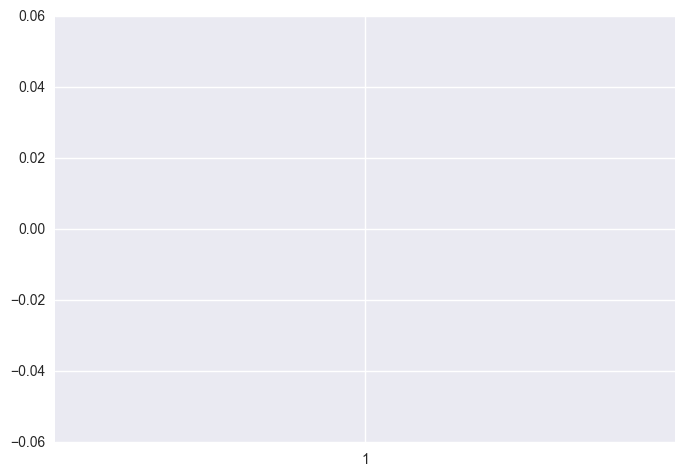

In [172]:
plt.boxplot(repu_reci['Reciprocity'])
##因为低端数据很集中，所以boxplot看不到效果

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          1.20000000e+01,   8.00000000e+00,   3.20000000e+01,
          7.70000000e+01,   1.26000000e+02,   1.22868000e+05,
          5.16900000e+03,   7.28000000e+02,   6.90000000e+02,
          3.47000000e+02,   1.16000000e+02,   1.77000000e+02,
          1.25000000e+02,   9.40000000e+01,   3.20000000e+01,
          6.60000000e+01,   4.80000000e+01,   2.10000000e+01,
          3.90000000e+01,   2.70000000e+01,   1.60000000e+01,
          1.60000000e+01,   2.60000000e+01,   8.00000000e+00,
          1.00000000e+01,   1.10000000e+01,   7.00000000e+00,
        

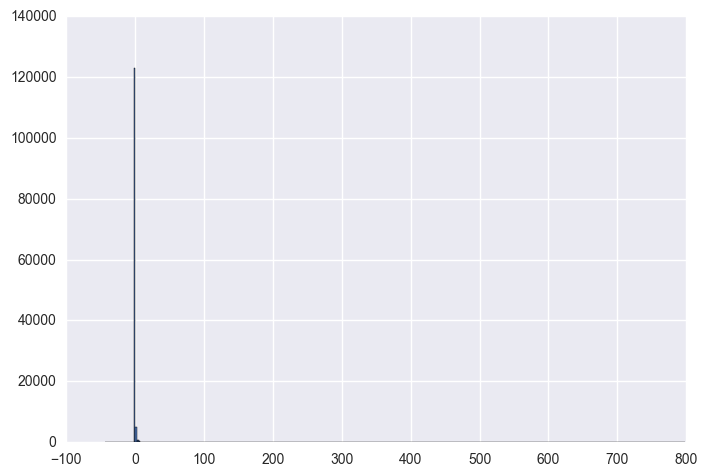

In [164]:
plt.hist(repu_reci['repu_diff'],bins=500)

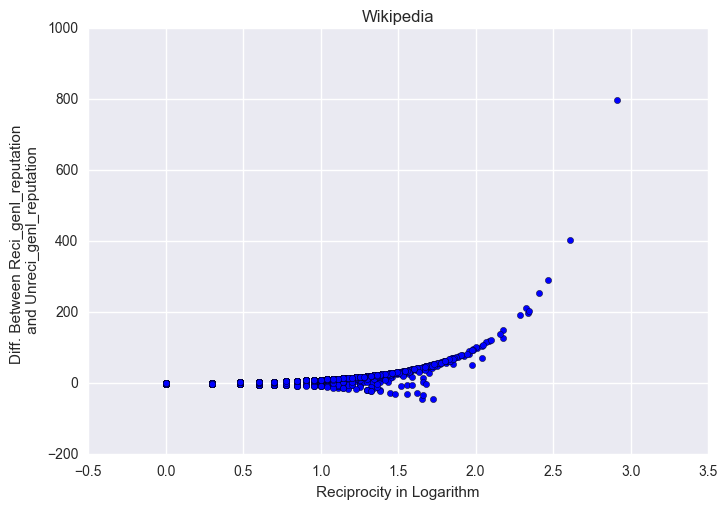

In [177]:
plt.scatter(np.log10(repu_reci["all_reci"].values),repu_reci['repu_diff'].values)
plt.xlabel("Reciprocity in Logarithm")
plt.ylabel("Diff. Between Reci_genl_reputation \n and Unreci_genl_reputation")
plt.title('Wikipedia')

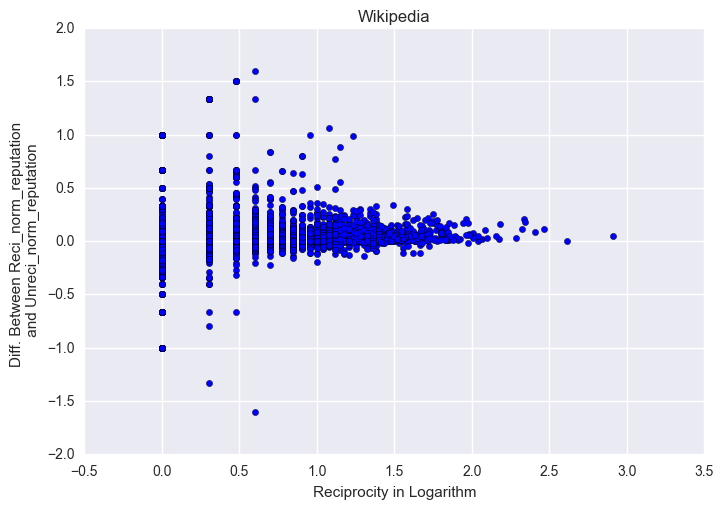

In [178]:
plt.scatter(np.log10(repu_reci["all_reci"].values),repu_reci['norm_repu_diff'].values)
plt.xlabel("Reciprocity in Logarithm")
plt.ylabel("Diff. Between Reci_norm_reputation \n and Unreci_norm_reputation")
plt.title('Wikipedia')

In [410]:
repu_reci.columns

Index(['node', 'reci_repu', 'reci_norm_repu', 'unreci_repu',
       'unreci_norm_repu', 'Reciprocity', 'all_reci', 'posi_reci', 'neg_reci',
       'repu_diff', 'norm_repu_diff', 'posi_neg_reci_diff'],
      dtype='object')